In [ ]:
import importlib
import Functions  
importlib.reload(Functions)
from Functions import *
import cv2
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
import os
from tkinter import font



Final example

In [ ]:
importlib.reload(Functions)
from Functions import *

Diamonds = Load_Family('Corners/', 'D')
Hearts = Load_Family('Corners/', 'H')
Spades = Load_Family('Corners/', 'S')
Clubs = Load_Family('Corners/', 'C')

families = Reunite_Familes(Diamonds,Hearts,Spades,Clubs)

image = cv2.imread('Full family/M.jpg')
result_image = image
cards, output = Find_cards(image)
matching_cards, cards_found = Match_Corners(cards, image , families)

for i, card in enumerate(matching_cards):

    result_image = draw_results(image, card)
    

print(len(cards_found))
print(len(matching_cards))

plt.imshow(result_image)
plt.title('Test')
plt.show()

In [ ]:
importlib.reload(Functions)
from Functions import *
image = cv2.imread('Full family/D.jpg')
image2 = Process_image(image)
plt.imshow(image2)
plt.title('Find cards')
plt.show()

Draw contours on cards

13


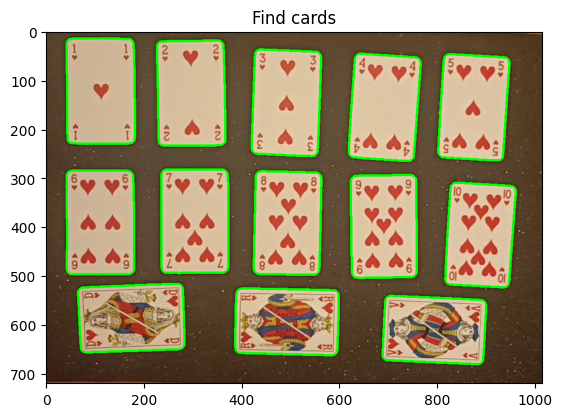

In [649]:
importlib.reload(Functions)
from Functions import *
image = cv2.imread('Full family/H.jpg')
cards, output= Find_cards(image)
print(len(cards))
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
plt.title('Find cards')
plt.show()

Test to show all contours

In [ ]:
# Charger l'image en couleur
image = cv2.imread('Full family/D.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)


retval, thresh = cv2.threshold(blur,THRESH_LVL,255,cv2.THRESH_BINARY)

# Find contours and their hierarchy
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
cv2.drawContours(image, contours, -1, (0, 255, 0), 5)

plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.show()

plt.imshow(blur, cmap='gray')
plt.title('Blurred')
plt.show()

plt.imshow(thresh, cmap='gray')
plt.title('thresh')
plt.show()

# Afficher l'image avec les contours
plt.imshow(image)
plt.title('Contours')
plt.show()


Isolate card

In [650]:
importlib.reload(Functions)
from Functions import *
image = cv2.imread('Full family/H.jpg')
cards, output= Find_cards(image)
card, processed= Process_Card(cards[11], image)

plt.imshow(card.img)
plt.title('Test')
plt.show()
plt.imshow(processed)
plt.title('Test')
plt.show()



TypeError: cannot unpack non-iterable Card object

Isolate corner + saving

In [ ]:
importlib.reload(Functions)
from Functions import *

image = cv2.imread('Full family/H.jpg')
cards, output= Find_cards(image)
card = Process_Card(cards[2], image) #change number here to get another card selected
card_corner_zoom, rank, suit= Get_Card_Corner(card.img)

Save_Corner(card_corner_zoom,'Test')

# Display the corner zoom, rank, and suit
plt.figure(figsize=(10, 5))

# Display the zoomed corner
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(card_corner_zoom, cv2.COLOR_BGR2RGB))  # Convert color for display
plt.title('Card Corner Zoom')
plt.axis('off')

# Display the rank
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rank, cv2.COLOR_BGR2RGB))  # Convert color for display
plt.title('Rank')
plt.axis('off')

# Display the suit
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(suit, cv2.COLOR_BGR2RGB))  # Convert color for display
plt.title('Suit')
plt.axis('off')

plt.tight_layout()
plt.show()



Create suits and ranks lists

In [ ]:
importlib.reload(Functions)
from Functions import *

Suits = Load_Suits('Suits/')
Ranks = Load_Ranks('Ranks/')


print(len(Suits))
print(len(Ranks))
print(Ranks[0].rank)

plt.imshow(Suits[2].img)
plt.title('Test')
plt.show()

Process Corner

In [ ]:
importlib.reload(Functions)
from Functions import *

Ranks = Load_Ranks('Ranks/')
Suits = Load_Suits('Suits/')
imageS = Suits[2].img
imageR = Ranks[4].img






Comparison between the templates and the zoomed corner

In [ ]:
importlib.reload(Functions)
from Functions import *

Ranks = Load_Ranks('Ranks/')
Suits = Load_Suits('Suits/')
imageS = Suits[2].img
imageR = Ranks[4].img


image = cv2.imread('Full family/H.jpg')
cards, output= Find_cards(image)
card = Process_Card(cards[7], image) 
card_corner_zoom, rank, suit= Get_Card_Corner(card.img)


diff1, roi1, roi2 = compute_diff_score(imageR,rank)
diff2, roi12, roi22 = compute_diff_score(imageS,suit)
print(diff2)
plt.imshow(roi12)
plt.title('Test')
plt.show()
plt.imshow(roi22)
plt.title('Test')
plt.show()

In [ ]:
import cv2
import numpy as np

def process_zoom(zoom_region):
    # Preprocess the image
    blur = cv2.GaussianBlur(zoom_region, (5, 5), 0)
    edges = cv2.Canny(blur, 50, 100)
    kernel = np.ones((2, 2))
    dial = cv2.dilate(edges, kernel=kernel, iterations=3)

    # Find contours
    contours, _ = cv2.findContours(dial, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Sort by contour area

    # Check if contours exist and return the bounding box
    if sorted_contours:
        # Get the bounding rectangle of the largest contour
        x, y, w, h = cv2.boundingRect(sorted_contours[0])
        
        # Draw the bounding rectangle on the image
        result_image = zoom_region.copy()  # Make a copy to draw on
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a green rectangle

        return result_image, (x, y, w, h)
    else:
        return zoom_region, None  # Return the original image and None if no contours are found


Ranks = Load_Ranks('Ranks/')
Suits = Load_Suits('Suits/')
imageS = Suits[0].img
imageR = Ranks[4].img

image,_ = process_zoom(imageS)
plt.imshow(image)
plt.title('Test')
plt.show()


Find matching corner 

In [ ]:
importlib.reload(Functions)
from Functions import *

Ranks = Load_Ranks('Ranks/')
Suits = Load_Suits('Suits/')

image = cv2.imread('Full family/C.jpg')
cards_contours, output = Find_cards(image)
print(len(cards_contours))

matching_cards, cards_found = Match_Corners(cards_contours, image , Ranks, Suits)

print(len(cards_found))
print(len(matching_cards))

for i, card in enumerate(matching_cards):
    plt.imshow(card.img, cmap='gray')
    plt.title(f'Match {i + 1}: {card.rank}{card.suit}')
    plt.show()



Draw results on image

In [ ]:
importlib.reload(Functions)
from Functions import *
for i, card in enumerate(cards_found):

    result_image = draw_results(image, card)

plt.imshow(result_image)
plt.title('Test')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image
image = cv2.imread('Corners/rank.jpg', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un flou et détecter les bords
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blur, 50, 100)
kernel = np.ones((4, 4))
dial = cv2.dilate(edges, kernel=kernel, iterations=2)

# Trouver les contours
contours, hierarchy = cv2.findContours(dial, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Trier par aire de contour

# Dessiner les boîtes englobantes pour les 2 plus grands contours
output = image.copy()

x, y, contour_width, contour_height = cv2.boundingRect(sorted_contours[0])
cv2.rectangle(output, (x, y), (x + contour_width, y + contour_height), (0, 255, 0), 2)  # Vert, épaisseur de 2

# Afficher les résultats
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Contours with Bounding Boxes')
plt.axis('off')
plt.show()


In [ ]:
importlib.reload(Functions)
from Functions import *

image = cv2.imread('Corners/JH.jpg')


image2 = cv2.imread('Corners/Test.jpg')


scores = compare_bounding_boxes_absdiff(image, image2)

print(scores)


In [ ]:

importlib.reload(Functions)
from Functions import *

image = cv2.imread('Full family/M.jpg')
cards, output= Find_cards(image)
card = Process_Card(cards[2], image) #change number here to get another card selected
#card_corner_zoom= Get_Card_Corner(card.img)
card_corner_zoom = cv2.imread('Corners/JS.jpg')
card_rank_zoom = card_corner_zoom[0:150, 0:160]
card_suit_zoom = card_corner_zoom[130:280, 0:160]

Save_Corner(card_rank_zoom,'rank')
Save_Corner(card_suit_zoom,'suit')
plt.imshow(card_rank_zoom)
plt.title('Contours with Bounding Boxes')
plt.axis('off')
plt.show()

In [ ]:
importlib.reload(Functions)
from Functions import *

Ranks = Load_Ranks('Ranks/')
Suits = Load_Suits('Suits/')
imageS = Suits[0].img
imageR = Ranks[4].img


image = cv2.imread('Full family/T.jpg')
cards, output= Find_cards(image)
card = Process_Card(cards[3], image) 
card_corner_zoom, rank, suit= Get_Card_Corner(card.img)
def process_zoom_with_visualization(zoom_region):
    # Preprocess the image
    # Preprocess the image
    common_size = (100, 100)
    resized_roi1 = cv2.resize(zoom_region, common_size, interpolation=cv2.INTER_AREA)
    blur = cv2.GaussianBlur(resized_roi1, (5, 5), 0)
    edges = cv2.Canny(blur, 25, 50)
    kernel = np.ones((5, 5))
    dial = cv2.dilate(edges, kernel=kernel, iterations=2)

   

    # Find contours
    contours, _ = cv2.findContours(dial, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Sort by contour area

    # Create a copy of the zoom region to draw on
    visualization = resized_roi1.copy()
    if len(visualization.shape) == 2:  # If grayscale, convert to BGR for color visualization
        visualization = cv2.cvtColor(visualization, cv2.COLOR_GRAY2BGR)

    # Draw contours and bounding rectangles
    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(visualization, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle
        cv2.drawContours(visualization, [contour], -1, (255, 0, 0), 2)  # Draw contour

    # Show the visualization
    cv2.imshow('Contours and Bounding Rectangles', visualization)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Return the bounding box of the largest contour, if it exists
    if sorted_contours:
        return cv2.boundingRect(sorted_contours[0])
    else:
        return None  # No bounding box found

# Call the function with the zoomed corner region
bounding_box = process_zoom_with_visualization(imageS)


